# Deep Learning
## P2.1: Recurrent Neural Networks
### Walmart Time Series

**Students**
- Victor Xesús Barreiro Dominguez
- Maximiliano Hormazábal Lagos 


**Note:** In the notebook.ipynb you can see all the intermediate results epoch by epoch and how the learning rate varies.

## Introducction

This work aims to develop and evaluate different recurrent neural network models for Walmart weekly sales prediction. For this purpose, the Walmart sales dataset of 45 stores, available in Kaggle, will be used. This dataset contains weekly sales information for 45 stores for the period from 2010 to 2012, along with factors affecting sales, such as holidays, temperature, fuel price, consumer price index (CPI), and unemployment rate.

The file "generateWalmartDataset.ipnb" will be used to generate the training and test time series, using the most recent 20% of the data for testing. Normalization will be applied to the values of the time series variables using the mean and standard deviation of each variable. In addition, it is established that the output attribute to be predicted will be the weekly sales in the next 3 weeks.

It is important to note that only the length of the generated sequences will be modified, leaving the other parameters unchanged. Different recurrent neural network architectures will be evaluated, including LSTM, GRU and simple RNN, and performance will be compared using the MAE (Mean Absolute Error) metric.

In summary, the objective is to present different recurrent neural network models and evaluate their performance for Walmart weekly sales prediction using a dataset with sales information and factors affecting sales, such as holidays, temperature, fuel price, CPI and unemployment rate.

## Explanations of experimentation and design

In this case we will focus on experimenting with those most characteristic aspects of recurrent networks. The hyperparameters common to other models such as the learning rate will use the default values of the libraries used, in the case of the batch size this is a restriction of the problem that we will keep to one.

1. **Different types of recurring units:**
In this part we will compare the behavior to solve the problem of the different types of units seen during the course. For all of them we will use the same design of a single recurring layer with 64 units and a dense layer with the same number of units. In all cases we will carry out two training sessions using the MAE or MSE as a cost function. As we have seen in previous regression problems, there are arguments for the use of any of the two functions, with which we will compare their behavior in order to choose one of them for the following tests.

After doing some initial tests, we have chosen 64 recurrent units and 64 neurons in the dense layer to make the comparison. Our idea is to make a model that is simple in structure but relatively large so that overfitting can be achieved. However, given the necessary computation time, we have taken the value 64 since we have seen that we did not find significant differences in its behavior with respect to the use of 256 in size. It should also be noted that we use the same seed in all the executions, the same learning rate and the same number of epochs to try to make the experiment as comparable as possible. We will properly adjust these parameters towards the end of the lab.

In general, we have been able to see that the best performance is achieved by the GRU units. The worst compartment is for SimpleRNN followed by bidirectional ones. Possibly, the SimplRNN is not being able to approximate the function that the data of our set follows, on the contrary, the bidirectional networks introduce a complexity and strategy does not seem to make sense in our problem, since we are facing a forecasting task, not a regression context sensitive as can be the case of the text. In a similar sense, it seems that the simplicity in terms of GRU doors gives it an advantage over LSTM, but as expected we did not find very large differences, taking into account the restrictions proposed for this comparison.

Therefore, we take the model with 64 GRU units and a dense layer of 64 neurons, with MSE cost function, as the best model, since it has shown a slightly better result.

2. **Regularization:**
Starting from the best previous model, we intend to improve its performance using regularization. It is important to note that in none of the previous models have we noticed a clear overfitting, neither in the ones proposed here nor in tests with much larger sizes and a high number of epochs, so it is to be expected that the impact of the regularization will not be very high at best.

We have applied L1-L2 regularization, L2 only and dropout. We have left out the normalization by batches since in this case the batch is set to 1, so it does not make sense to apply this technique. In our test we have been able to see how we did not get the results to improve clearly. In most cases they worsened drastically, trying to reduce the impact of normalization, we have been getting closer to the values we reached before applying it. But in no way have we managed to improve the results without normalization, which would go in the direction with which we started this section, since we are not dealing with a model with overfitting, it is unlikely that the regularization will be successful. It should be noted that in the case of the regularization application, only L2 with a very low value, we get results that are similar to those achieved without regularization.

Also note that when we apply the L1 and L2 regularizations or just the L2 we do so on all the parameters of the recurrent layer and the dense layer. Applying these techniques in another way does not seem justified. We would be forcing part of our parameters to remain small and another not, so we could encounter problems so that the network converges to a minimum on our objective space.

3. **Stacking recurring layers:**
We have seen the impact on this problem of the choice of recurring units and regularization, at this time we will try to build more complex models to improve the results so far, for this we start from the model with the best performance and we will increase the number of recurring layers .

We collect the case of two and three recurring layers, in the first of them the performance of the model worsens remarkably, while in the second the performance improves, in a very, very slight way. We do not perceive a significant improvement regarding the increase in complexity of adding these layers, since even in the case of three the best one is so slight that it may be due to the stochastic aspects that these models involve.

It could be interesting to propose much more complex models to ensure these conclusions, however, these models have high computational resources and given the scope of this project we do not see it as necessary.

4. **Simplification:**
As we have previously commented, these models have a certain complexity and make use of important computational resources, not compared with large deep learning models but with other types of algorithms or prediction models. Therefore, we ask ourselves to what extent we can reduce the complexity of our model while maintaining acceptable results.

In this way, we propose a model with a quarter of the size in the recurrent and dense layer using only 16 units in each of them, we see that it shows a good result, even exceeding the proposed result of 64,000 MAE and reaching 53374. We have tried to apply regularization to this model without success, we collect the one that has shown the best results.

At this point, we intend to further reduce its size with only 8 units in each layer, which means a model of 465 parameters. Again, the new model achieves surprisingly good results with a MAE of 58033. In this case, the best model we have reached uses L2 regularization.

The main conclusion is the important impact of using a new architecture suitable for our problem, since with really small models we can achieve surprising results. Along the same lines, it is necessary to highlight the importance of the complete design, inappropriate hyperparameters such as the cost function, activation functions or regularization values can lead us to obtain very good or bad results.

5. **Seeking to improve results:**
In this last part we change the focus from experimentation and comparison of models to focus on achieving the best results.


0. **Sequence aspects:**
We have tested different values of sequence length concluding that the most appropriate is 12. For much larger or smaller values the performance worsens. Given the scope of this work and that this is a data preprocessing parameter, we have not introduced the comparison as a section in this report. This aspect is highly dependent on the specific case that we are solving and not so much a parameter that can be generalized to the techniques studied.

In any case, it is important to comment that in general it is a question of finding a balance so that the input of the model is large enough so that it has a context to make the prediction without greatly reducing the size of the samples when using very long sequences.

Other consequences of introducing a very large context is that the context introduced contains too much noise as it is much larger than the pattern to be detected. Here it is important to take into account the context in which our data sequence arises. Finally, another factor is whether there is overlap between the examples generated as a training set.

## Results

The following table shows the results obtained in the different proposed architectures shown below. Therefore it summarizes the specific metric value obtained for the MAE, it is important to comment that the column "Loss Metric" explains which was the metric used during the training to regulate it (which can vary between the MAE and the MSE), but the final metric shown in each row is always the MAE.


|                  **Model Type**                  |    **Units**    |    **Loss Metric**    | **MAE Value** |
|:------------------------------------------------:|:---------------:|:---------------------:|:-------------:|
| Bidirectional-LSTM                               |        64       |  _mean_squared_error_ |    70902.66   |
| Bidirectional-LSTM                               |        64       |  _mean_absolute_error_ |    56518.98   |
| LSTM                                             |        64       |   _mean_squared_error_ |    62852.59   |
| LSTM                                             |        64       |  _mean_absolute_error_ |    57579.56   |
| GRU                                              |        64       |   _mean_squared_error_ |    51234.13   |
| GRU                                              |        64       |  _mean_absolute_error_ |    52962.21   |
| Simple RNN                                       |        64       |   _mean_squared_error_ |   107824.02   |
| Simple RNN                                       |        64       |  _mean_absolute_error_ |   108662.38   |

Table: Recurrent Units

|                  **Model Type**                  |    **Units**    |    **Loss Metric**    | **MAE Value** |
|:------------------------------------------------:|:---------------:|:---------------------:|:-------------:|
| GRU-Regularization l1l2                          |        64       |  _mean_squared_error_ |    54356.42   |
| GRU-Regularization l2                            |        64       |  _mean_squared_error_ |    51469.50   |
| GRU-Regularization Dropout                       |        64       |  _mean_squared_error_ |    71675.10   |

Tabke: Regularization techniques


|                  **Model Type**                  |    **Units**    |    **Loss Metric**    | **MAE Value** |
|:------------------------------------------------:|:---------------:|:---------------------:|:-------------:|
| 2 GRU Stacked                                    |        64       |  _mean_squared_error_ |    66251.20   |
| 3 GRU Stacked                                    |        64       |  _mean_squared_error_ |    49728.65   |

Table: Stacking recurrent Layers


|                  **Model Type**                  |    **Units**    |    **Loss Metric**    | **MAE Value** |
|:------------------------------------------------:|:---------------:|:---------------------:|:-------------:|
| GRU - Adaptive Learning rate                     |        16       |  _mean_squared_error_ |    53374.25   |
| GRU-Simplified-Regularized                       |        8        |  _mean_squared_error_ |    58033.60   |

Table: Simplification


|                  **Model Type**                  |    **Units**    |    **Loss Metric**           | **MAE Value** |
|:------------------------------------------------:|:---------------:|:----------------------------:|:-------------:|
| GRU-ReduceLROnPlateau                            |        64       | _mean_absolute_error_        |    45857.22   |

Table: Seeking to improve results


Before concluding, note that in the cases in which the MAE metric is used as a cost function, it is also used as a metric. This is due to the operation of queras, the results obtained in the cost function are not "real" results, but the average of the results obtained for each iteration of the epoch is calculated. On the other hand, the results of the metric are calculated at the end based on the weights obtained at that time. Therefore, we will see slightly different charts even when we are using MAE as loss and as metric.


## Code

Given the batch size and the characteristics of these networks, it is faster to use the CPU.

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
from tensorflow import keras

2023-04-13 10:35:03.048350: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 10:35:03.105550: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-13 10:35:03.383664: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/victorxesus.barreiro/anaconda3/envs/deepgpu4/lib/
2023-04-13 10:35:03.383695: W tensorflow/

In [2]:
import time
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import Input, Model
from keras.utils import plot_model

from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np

# Directory where the checkpoints will be saved.
dir = "models/"

def visualize_fit(history):
    """Visualize the fit of a model. 

    Args:
        history (list): list of metrics along the epochs.  
    """    
    history_dict = history.history
    print(history_dict.keys())
    history_dict.keys()

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'b-o', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

    plt.title('Training and validation loss: MSE')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history_dict['mean_absolute_error']
    val_acc = history_dict['val_mean_absolute_error']

    plt.plot(epochs, acc, 'b-o', label='Training NAE')
    plt.plot(epochs, val_acc, 'r-o', label='Validation MAE')
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.ylim([0, 0.6])
    plt.legend()

    plt.tight_layout()
    plt.show()

def fitModel(model, ds_train, ds_val, num_epochs=20, monitor='val_mean_absolute_error', model_name='best_model.h5', callbacks=[]):
    """Function to train a model. It saves the best model in a file. It also prints the evolution of the training process.


    Args:
        model (Model): The model to be trained.
        ds_train (_type_): The training dataset. 
        ds_val (_type_): The validation dataset.
        num_epochs (int, optional): Defaults to 20.
        monitor (str, optional): Metric to monitor and save the best model. Defaults to 'val_mean_absolute_error'. 
        model_name (str, optional): Name of the file where the best model will be saved. Defaults to 'best_model.h5'.
        callbacks (list, optional): List of callbacks to be used during training. Defaults to [].

    Returns:
        final_metrics (list): List with the final metrics of the model
    """    
    checkpoint = ModelCheckpoint(dir + model_name, save_best_only=True, save_weights_only=False, monitor=monitor, mode='auto', verbose=1)
    history = model.fit(ds_train, epochs=num_epochs, callbacks=callbacks+[checkpoint], validation_data=ds_val, verbose=1)
    result_metrics = model.evaluate(ds_val)
    print(result_metrics)
    visualize_fit(history)
    return result_metrics

## Auxiliar Code

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#Returns a numpy array with size nrows x ncolumns-1. nrows and ncolums are the rows and columns of the dataset
#the Date column is skipped (ncolumns-1)
def readData(fname):
    with open(fname) as f:
        fileData = f.read()
  
    lines = fileData.split("\n")
    header = lines[0].split(",")
    lines = lines[1:] 
    #print(header) 
    #print("Data rows: ", len(lines))

    rawData = np.zeros((len(lines), len(header)-1)) #skip the Date column

    for i, aLine in enumerate(lines):       
        splittedLine = aLine.split(",")[:]
        rawData[i, 0] = splittedLine[0]
        rawData[i, 1:] = [float(x) for x in splittedLine[2:]] 

    return rawData

#Returns the train and test data, normalized. It also returns the standard deviation of Weekly_Sales
#Each list has a size equal to the number of stores
#For each store there is a list of size trainNSaples (testNSamples) x nColums-1 (the store id is skipped)
#Columns: Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
def splitTrainTest(rawData, testPercent):

    listStore = np.unique(rawData[:, 0])
    trainNSamples = np.zeros(len(listStore))
    
    for i, storeId in enumerate(listStore):
        trainNSamples[i] = np.count_nonzero(rawData[:, 0] == storeId)
    trainNSamples = np.floor((1-testPercent) *  trainNSamples)

    tmpTrain = np.zeros((int(np.sum(trainNSamples)), len(rawData[0])))

    store = -1
    counter = 0
    counterTrain = 0
    storeDict = dict(zip(listStore, trainNSamples))
    for i, aLine in enumerate(rawData):
        if store != aLine[0]:
            store = int(aLine[0])
            counter = 0
        if(counter < storeDict.get(store)):
            tmpTrain[counterTrain] = rawData[i][:]
            counterTrain += 1
            counter += 1

    meanData = tmpTrain.mean(axis=0)
    stdData = tmpTrain.std(axis=0)
    rawNormData = (rawData - meanData) / stdData

    allTrain = list()
    allTest = list()
    store = -1
    counter = 0
    for i, aLine in enumerate(rawNormData):
        splittedLine = [float(x) for x in aLine[1:]] #skip store id
        if store != rawData[i][0]:
            if i != 0:
                allTrain.append(storeDataTrain)
                allTest.append(storeDataTest)
            store = int(rawData[i][0])
            storeDataTrain = list()
            storeDataTest = list()
            counter = 0

        if(counter < storeDict.get(store)):
            storeDataTrain.append(splittedLine)
            counter += 1
        else:
            storeDataTest.append(splittedLine)

        if i == len(rawNormData)-1:
            allTrain.append(storeDataTrain)
            allTest.append(storeDataTest)

    return allTrain, allTest, stdData[1] #std of wSales

#generates a time series given the input and ouput data, the sequence length and the batch size
#seqLength is the number of weeks (observations) of data to be used as input
#the target will be the weekly sales in 2 weeks
def generateTimeSeries(data, wSales, seqLength, batchSize):   
    sampling_rate = 1 #keep all the data points 
    weeksInAdvance = 3
    delay = sampling_rate * (seqLength + weeksInAdvance - 1) #the target will be the weekly sales in 2 weeks
    
    dataset = keras.utils.timeseries_dataset_from_array(
        data[:-delay],
        targets=wSales[delay:],
        sampling_rate=sampling_rate,
        sequence_length=seqLength,
        shuffle=True,
        batch_size=batchSize,
        start_index=0)
    
    return dataset


def printTimeSeriesList(theList):
    print('list length', len(theList))
    print('First element')
    input, target = theList[0]
    print([float(x) for x in input.numpy().flatten()], [float(x) for x in target.numpy().flatten()])
    print('Last element')
    input, target = theList[-1]
    print([float(x) for x in input.numpy().flatten()], [float(x) for x in target.numpy().flatten()])

#returns the training and test time series
#it also returns the standard deviation of Weekly_Sales, and the number of input features
def generateTrainTestData(fileName, testPercent, seqLength, batchSize):
    rawData = readData(os.path.join(fileName))
    allTrain, allTest, stdSales = splitTrainTest(rawData, testPercent)
    
    for i in range(len(allTrain)):
        tmp_train = generateTimeSeries(np.array(allTrain[i]), np.array(allTrain[i])[:,0], seqLength, batchSize)
        tmp_test = generateTimeSeries(np.array(allTest[i]), np.array(allTest[i])[:,0], seqLength, batchSize)

        if i == 0:
            train_dataset = tmp_train
            test_dataset = tmp_test
        else:
            train_dataset = train_dataset.concatenate(tmp_train)
            test_dataset = test_dataset.concatenate(tmp_test)
    
    return train_dataset, test_dataset, stdSales, np.shape(allTrain)[2]

In [4]:
#generateTrainTestData(fileName, testPercent, seqLength, batchSize):
#trainData, testData: each element comes from keras.utils.timeseries_dataset_from_array, i.e., is a time series
#Columns: Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment

testPercent = 0.2
seqLength = 12
batchSize = 1
trainData, testData, stdSales, nFeatures = generateTrainTestData("walmart-sales-dataset-of-45stores.csv",
    testPercent, seqLength, batchSize) 
stdSales

2023-04-13 10:35:03.729869: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-13 10:35:03.729886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ctdesks28
2023-04-13 10:35:03.729889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ctdesks28
2023-04-13 10:35:03.729939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 530.30.2
2023-04-13 10:35:03.729948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 530.30.2
2023-04-13 10:35:03.729950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 530.30.2
2023-04-13 10:35:03.730119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAP

571854.7800576452

In [5]:
stdSales

571854.7800576452

COMENTARIO SOBRE GRŔAFICAS DISNTIANS EN LOS CASOS DE MAE

## Recurrent Arquitectures

### Bidireccional-LSTM

#### MSE

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 12, 128)          36352     
 l)                                                              
                                                                 
 dense (Dense)               (None, 12, 64)            8256      
                                                                 
 dense_1 (Dense)             (None, 12, 1)             65        
                                                                 
Total params: 44,673
Trainable params: 44,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4000/4005 [============================>.] - ETA: 0s - loss: 0.1261 - mean_absolute_error: 0.2068
Epoch 1: val_

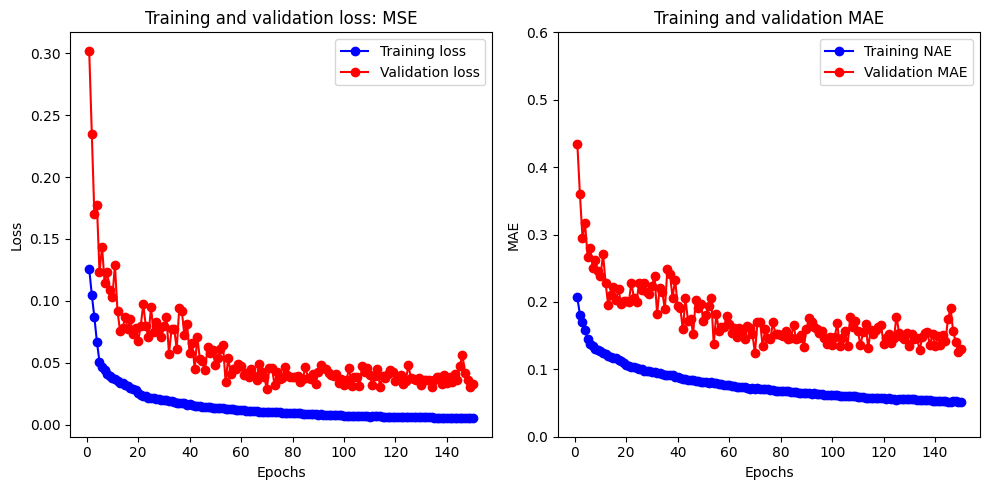

Test MAE: 74509.04
Elapsed time:  1177.6410851478577


In [13]:
np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)


model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="bidireccional_mse.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [14]:
model = keras.models.load_model(dir + "bidireccional_mse.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0288 - mean_absolute_error: 0.1240


70902.66325003005

#### MAE

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 128)          36352     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 12, 64)            8256      
                                                                 
 dense_3 (Dense)             (None, 12, 1)             65        
                                                                 
Total params: 44,673
Trainable params: 44,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3990/4005 [============================>.] - ETA: 0s - loss: 0.2048 - mean_absolute_error: 0.2048
Epoch 1: va

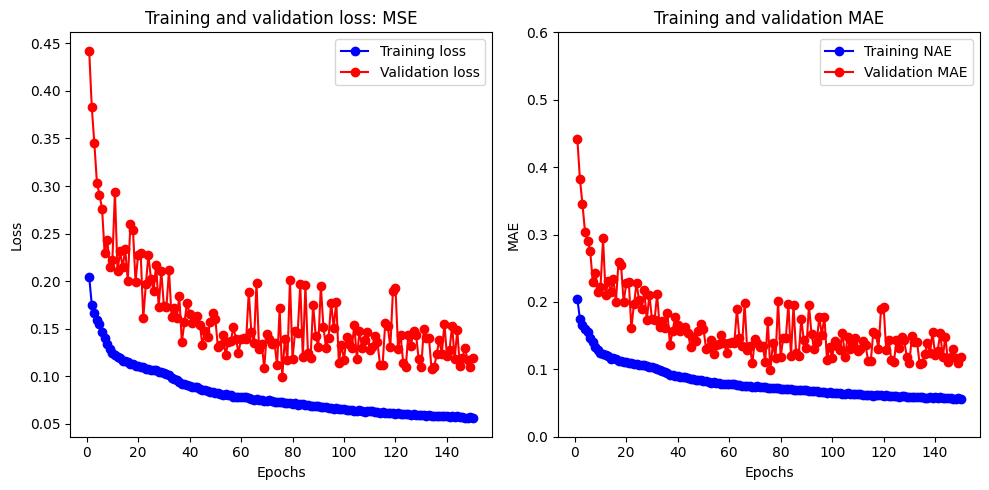

Test MAE: 68062.22
Elapsed time:  1126.3369226455688


In [15]:
np.random.seed(423423)
tf.random.set_seed(1232413)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="mean_absolute_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="bidireccional_mae.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [16]:
model = keras.models.load_model(dir + "bidireccional_mae.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0988 - mean_absolute_error: 0.0988


56518.98109763446

In this case we see that the case of the model with the MAE cost function shows a much better final result. Looking at the graphs we see an important difference, the case of MSE shows a much smoother behavior while the case of MAE shows much more pronounced oscillations. This behavior is to be expected, since the MSE function is likely to be smoother, on the contrary, the MAE, by increasing the differences, allows us to approach lower minimums.

Note that we do not appreciate a clear tendency to overfitting despite using a very high number of epochs. In both cases, it stagnates from epoch 70. In the case of the MSE, the acceleration of the "curve" is much greater until epoch 20, while in the case of the MAE this first trend reaches epoch 50.

Note that only the case of MAE reaches the minimum required result.

### LSTM

#### MSE

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3978/4005 [============================>.] - ETA: 0s - loss: 0.1175 - mean_absolute_error: 0.1995
Epoch 1: val_mean_absolute_error improved from inf to 0.42399, saving model t

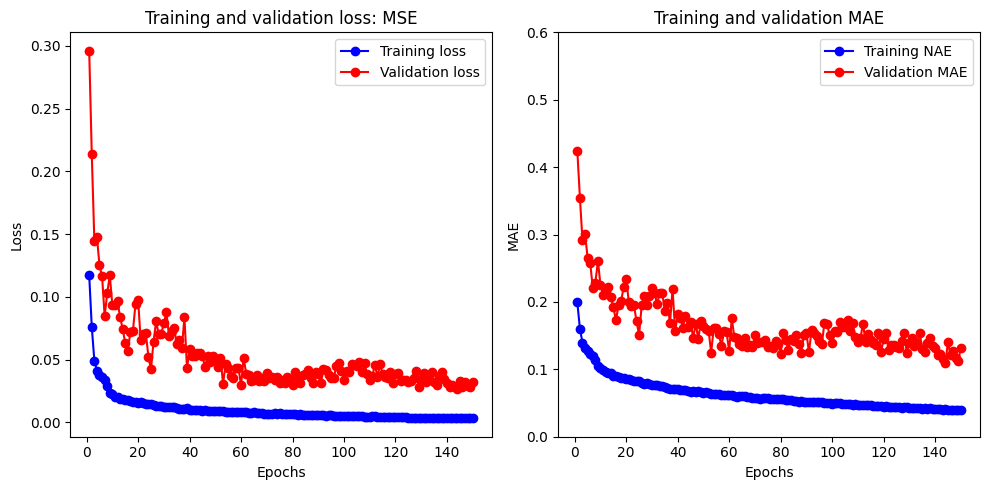

Test MAE: 75691.11
Elapsed time:  955.8027489185333


In [17]:
np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.LSTM(64, return_sequences=False)(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)


model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="lstm_mse.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [18]:
model = keras.models.load_model(dir + "lstm_mse.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0266 - mean_absolute_error: 0.1099


62852.59089713704

#### MAE

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                18176     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3996/4005 [============================>.] - ETA: 0s - loss: 0.1987 - mean_absolute_error: 0.1987
Epoch 1: val_mean_absolute_error improved from inf to 0.42837, saving model t

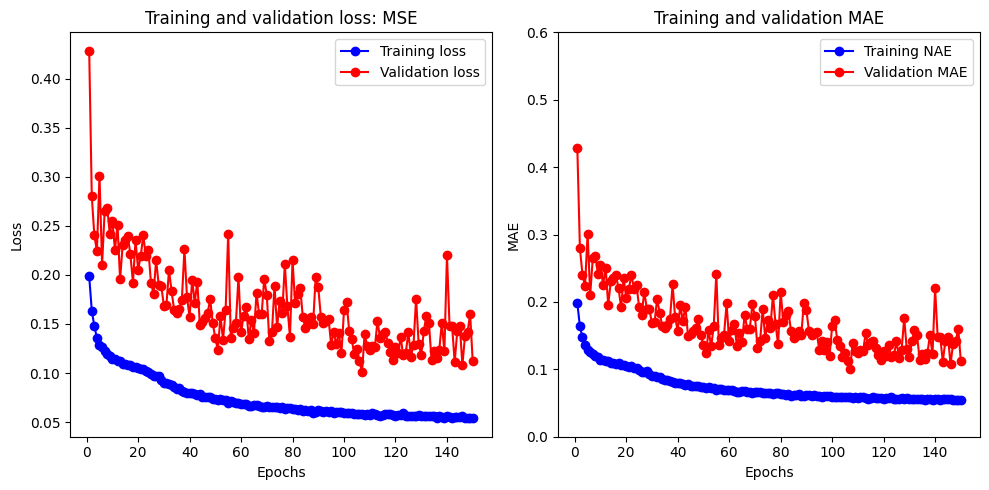

Test MAE: 64198.22
Elapsed time:  968.5389609336853


In [19]:
np.random.seed(423423)
tf.random.set_seed(1232413)

start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.LSTM(64, return_sequences=False)(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="mean_absolute_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="lstm_mae.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [20]:
model = keras.models.load_model(dir + "lstm_mae.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.1007 - mean_absolute_error: 0.1007


57579.559170235036

The results in this case are clearly better, not only in terms of the minimums reached, but also because we see more monotonous trends in the graphs.

As in the previous case, we do not appreciate overfitting, although it shows clearly better results on the train set, as expected.

If we remember the bidirectional case, we interpret that the improvement in results in this case is given because our problem to solve is a forecasting task for which the use of a bidirectional architecture does not seem to provide a better solution. On the contrary, it is to be expected that this complexity worsens the training of the models as we see.

### GRU

#### MSE

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 gru (GRU)                   (None, 64)                13824     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3992/4005 [============================>.] - ETA: 0s - loss: 0.1124 - mean_absolute_error: 0.2025
Epoch 1: val_mean_absolute_error improved from inf to 0.31465, saving model t

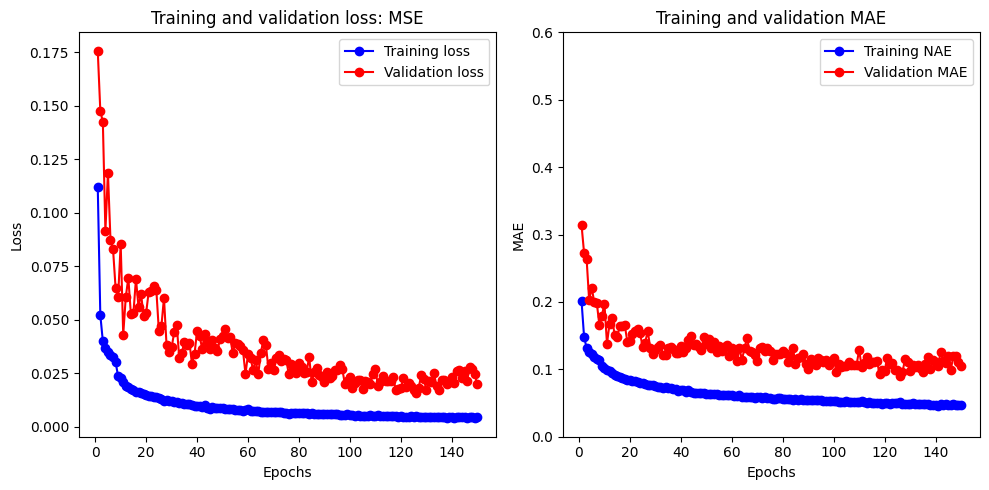

Test MAE: 60348.83
Elapsed time:  1019.620130777359


In [21]:
np.random.seed(423423)
tf.random.set_seed(1232413)

start_time = time.time()

inputs = keras.Input(shape=(seqLength, 6))
x = keras.layers.GRU(64, return_sequences=False)(inputs)
x = keras.layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="gru_mse.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [22]:
model = keras.models.load_model(dir + "gru_mse.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0158 - mean_absolute_error: 0.0896


51234.134587925975

#### MAE

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                13824     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3984/4005 [============================>.] - ETA: 0s - loss: 0.2063 - mean_absolute_error: 0.2063
Epoch 1: val_mean_absolute_error improved from inf to 0.29105, saving model t

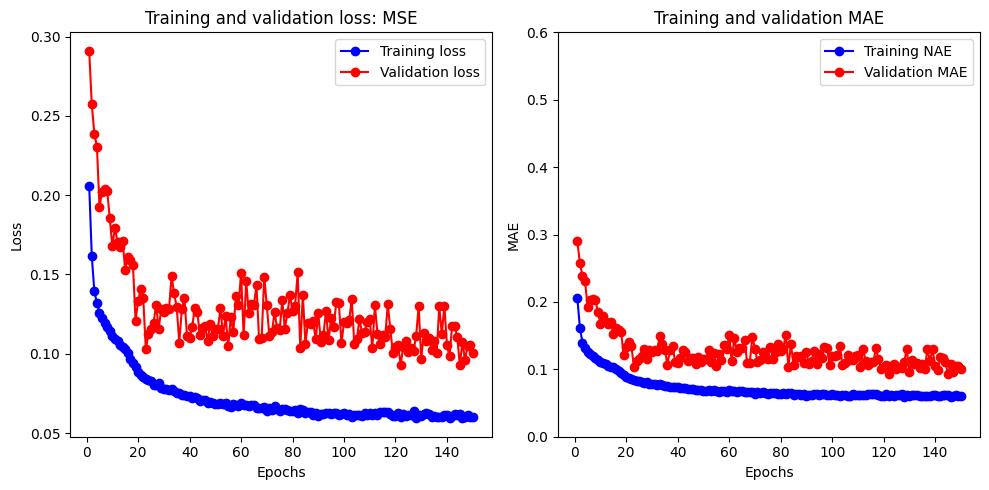

Test MAE: 57328.29
Elapsed time:  998.7777559757233


In [23]:
np.random.seed(423423)
tf.random.set_seed(1232413)

start_time = time.time()

inputs = keras.Input(shape=(seqLength, 6))
x = keras.layers.GRU(64, return_sequences=False)(inputs)
x = keras.layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="mean_absolute_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="gru_mae.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [24]:
model = keras.models.load_model(dir + "gru_mae.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0926 - mean_absolute_error: 0.0926


52962.20741291673

If we start by looking at the difference between MSE and MAE, we see that the trend in the graphs is similar to the previous cases, a more abrupt behavior in MAE and a smoother behavior in MSE. However, in this case the best result is achieved with MSE.

We see that compared to previous models, the results are better. We believe that this is due to the fact that these units are simpler than the LSTM and this is more appropriate to the characteristics of our problem.

#### Simple RNN

#### MSE

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                4544      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3993/4005 [============================>.] - ETA: 0s - loss: 0.0881 - mean_absolute_error: 0.1940
Epoch 1: val_mean_absolute_error improved from inf to 0.36884, saving model to 

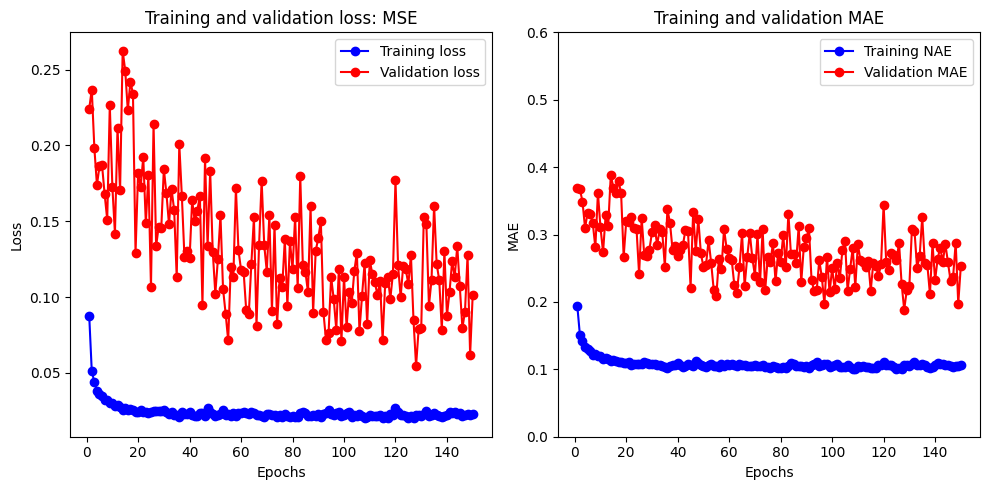

Test MAE: 144803.73
Elapsed time:  510.2661323547363


In [25]:
np.random.seed(423423)
tf.random.set_seed(1232413)

start_time = time.time()

inputs = keras.Input(shape=(seqLength, 6))
x = keras.layers.SimpleRNN(64, return_sequences=False)(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="simpleRnn_mse.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [26]:
model = keras.models.load_model(dir + "simpleRnn_mse.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0547 - mean_absolute_error: 0.1886


107824.01716434973

#### MAE

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                4544      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3949/4005 [============================>.] - ETA: 0s - loss: 0.2263 - mean_absolute_error: 0.2263
Epoch 1: val_mean_absolute_error improved from inf to 0.35813, saving model to 

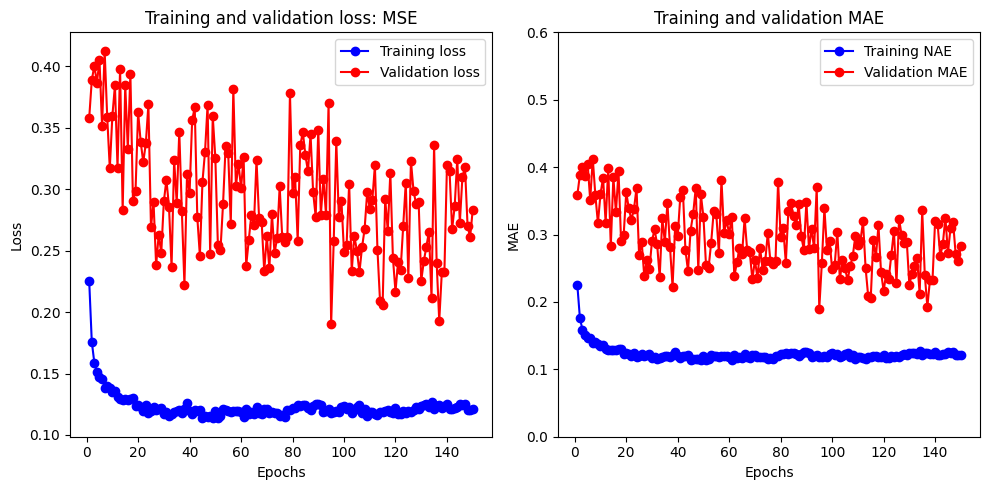

Test MAE: 161860.94
Elapsed time:  513.2148010730743


In [27]:
np.random.seed(423423)
tf.random.set_seed(1232413)

start_time = time.time()

inputs = keras.Input(shape=(seqLength, 6))
x = keras.layers.SimpleRNN(64, return_sequences=False)(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="mean_absolute_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="simpleRnn_mae.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [28]:
model = keras.models.load_model(dir + "simpleRnn_mae.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.1900 - mean_absolute_error: 0.1900


108662.37676884537

These drives show the worst performance by far. The behavior seen in the previous ones with respect to the MSE and MAE graphs is maintained.

If we wanted to do a more detailed analysis, it would be appropriate to fine tune the learning rate, since this could be the reason for the abrupt behavior in both cases.

## Regularization

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 12, 6)]           0         
                                                                 
 gru_15 (GRU)                (None, 64)                13824     
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4004/4005 [============================>.] - ETA: 0s - loss: 0.1163 - mean_absolute_error: 0.2047
Epoch 1: val_mean_absolute_error improved from inf to 0.28499, saving model 

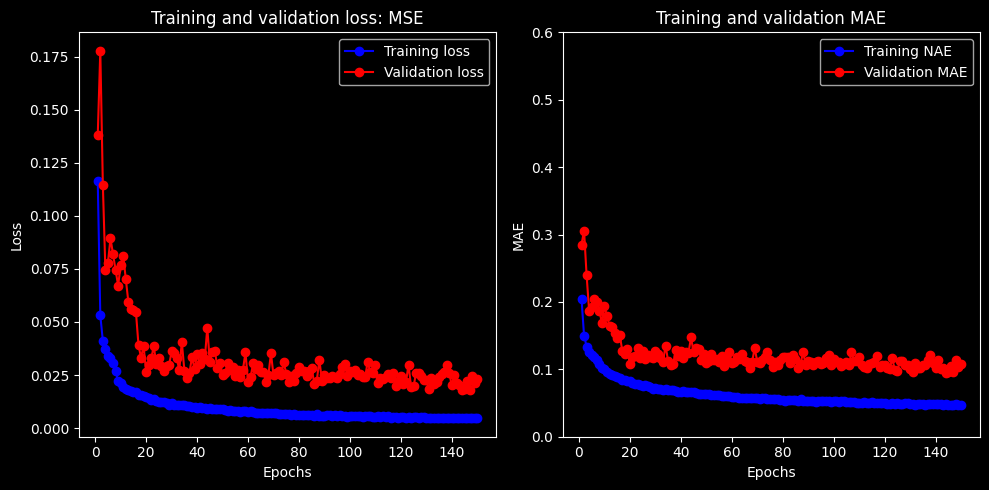

Test MAE: 61293.21
Elapsed time:  1394.2307426929474


In [51]:
from keras.regularizers import  *

reg_val = 0.00000001

np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.GRU(64, return_sequences=False, kernel_regularizer=l1_l2(l1=reg_val, l2=reg_val), bias_regularizer=l1_l2(l1=reg_val, l2=reg_val), recurrent_regularizer=l1_l2(l1=reg_val, l2=reg_val), activity_regularizer=l1_l2(l1=reg_val, l2=reg_val))(inputs)
x = keras.layers.Dense(64, activation="relu", kernel_regularizer=l1_l2(l1=reg_val, l2=reg_val), bias_regularizer=l1_l2(l1=reg_val, l2=reg_val))(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)


model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="gru_mse_regularizer_l12.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [52]:
model = keras.models.load_model(dir + "gru_mse_regularizer_l12.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 3ms/step - loss: 0.0182 - mean_absolute_error: 0.0951


54356.42421513412

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 gru_8 (GRU)                 (None, 64)                13824     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4003/4005 [============================>.] - ETA: 0s - loss: 0.1113 - mean_absolute_error: 0.1980
Epoch 1: val_mean_absolute_error improved from inf to 0.30315, saving model t

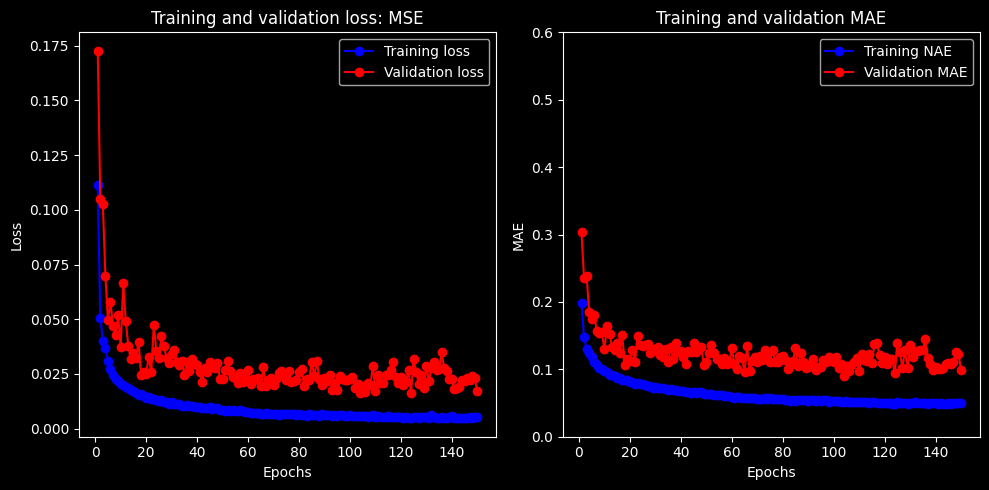

Test MAE: 56516.37
Elapsed time:  1020.3717601299286


In [28]:
from keras.regularizers import  *

reg_val = 0.00000001

np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.GRU(64, return_sequences=False, kernel_regularizer=L2(reg_val), bias_regularizer=L2(reg_val), recurrent_regularizer=L2(reg_val), activity_regularizer=L2(reg_val))(inputs)
x = keras.layers.Dense(64, activation="relu", kernel_regularizer=L2(reg_val), bias_regularizer=L2(reg_val))(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)


model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="gru_mse_regularizerL2.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [29]:
model = keras.models.load_model(dir + "gru_mse_regularizerL2.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0162 - mean_absolute_error: 0.0900


51469.501422327645

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 12, 6)]           0         
                                                                 
 gru_16 (GRU)                (None, 64)                13824     
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
4004/4005 [============================>.] - ETA: 0s - loss: 0.1187 - mean_absolute_error: 0.2111
Epoch 1: val_mean_absolute_error improved from inf to 0.43292, saving model 

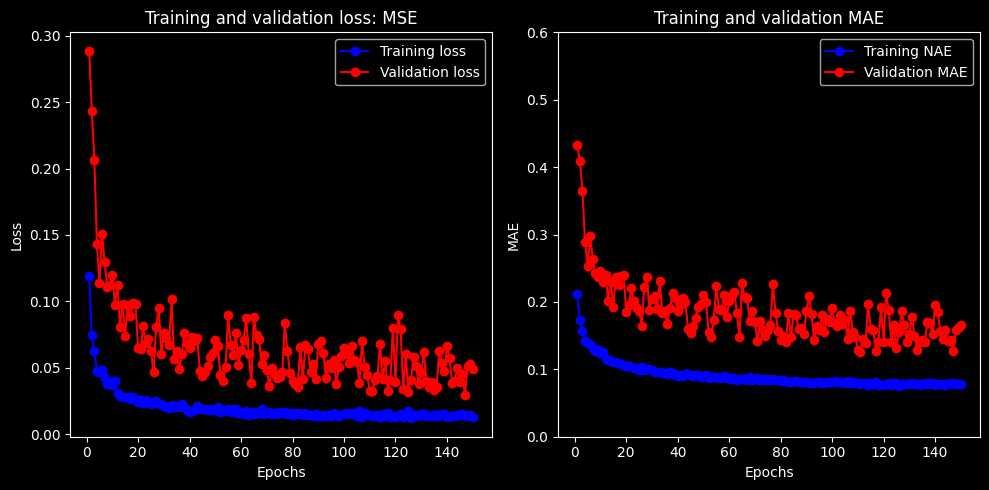

Test MAE: 95043.80
Elapsed time:  1275.8469133377075


In [53]:
from keras.regularizers import  *

drop_out_val = 0.05

np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.GRU(64, return_sequences=False, dropout=drop_out_val)(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
z = keras.layers.Dropout(drop_out_val)(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)


model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="gru_mse_regularizer_dropout.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [54]:
model = keras.models.load_model(dir + "gru_mse_regularizer_dropout.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0322 - mean_absolute_error: 0.1253


71675.10207573668

We see that by applying L1 or L2 regularization, we have a smoother trend in the curves. We also see this behavior with the dropout case but on a smaller scale.

It should be noted that the values shown have been the product of an iterative adjustment, we collect here the best results.

We see that we do not get a notable improvement, even with the best result of applying these techniques. This is to be expected since we are not in the starting model that does not show overfitting.

# Stacking recurrent layers

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                13824     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3988/4005 [============================>.] - ETA: 0s - loss: 0.1089 - mean_absolute_error: 0.1985
Epoch 1: val_mean_absolute_error improved from inf to 0.30779, saving model to 

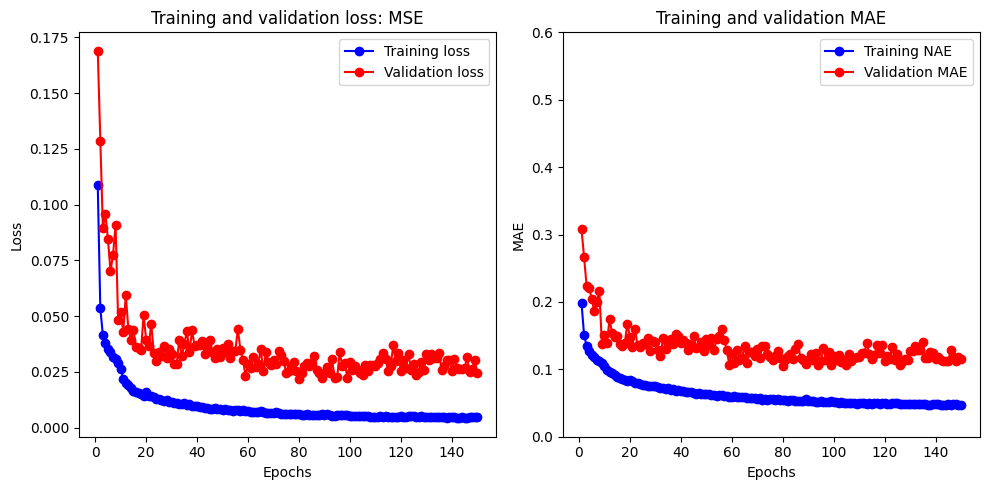

Test MAE: 66251.20
Elapsed time:  950.2928636074066


In [11]:
from keras.regularizers import  *

np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.GRU(64, return_sequences=True)(inputs)
x = layers.GRU(64, return_sequences=False)(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)


model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="gru_2recurrent.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [12]:
mdoel = keras.models.load_model(dir + "gru_2recurrent.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 0s 2ms/step - loss: 0.0245 - mean_absolute_error: 0.1159


66251.1964671324

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 gru_2 (GRU)                 (None, 64)                13824     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3983/4005 [============================>.] - ETA: 0s - loss: 0.1031 - mean_absolute_error: 0.1949
Epoch 1: val_mean_absolute_error improved from inf to 0.26083, saving model to 

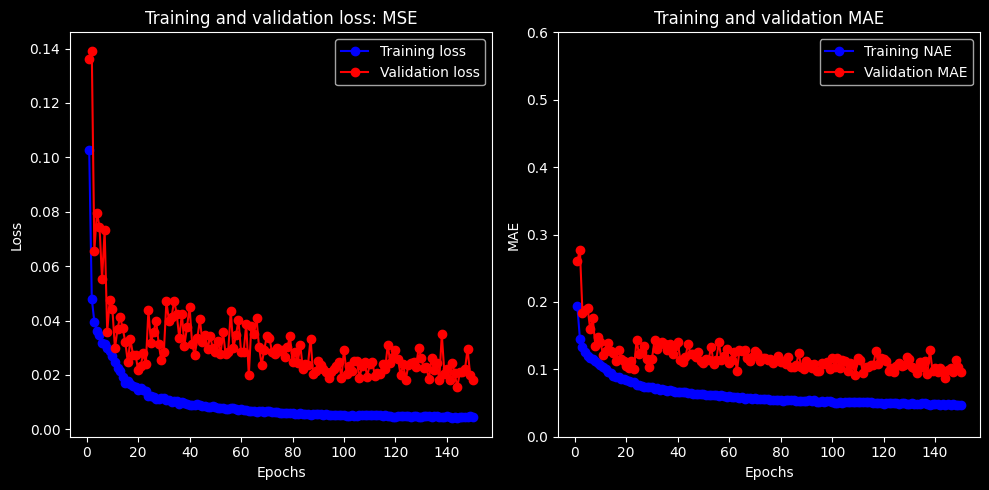

Test MAE: 54751.86
Elapsed time:  1010.1395123004913


In [13]:
from keras.regularizers import  *

np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.GRU(64, return_sequences=True)(inputs)
x = layers.GRU(64, return_sequences=True)(inputs)
x = layers.GRU(64, return_sequences=False)(inputs)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=150, model_name="gru_3recurrent.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [14]:
model = keras.models.load_model(dir + "gru_3recurrent.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0154 - mean_absolute_error: 0.0870


49728.64664695123

We see that by adding three layers we achieve slightly better results. However, we have not been able to improve the results achieved by the starting model, despite the fact that in the training curves we see that a point of no improvement in the results is reached towards half of the epochs used.

We believe that this happens because the complexity introduced by stacking recurrent networks does not model our problem better, thus we do not manage to improve the results.

# Simplification

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 gru_7 (GRU)                 (None, 16)                1152      
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3985/4005 [============================>.] - ETA: 0s - loss: 0.1293 - mean_absolute_error: 0.2071
Epoch 1: val_mean_absolute_error improved from inf to 0.35519, saving model to 

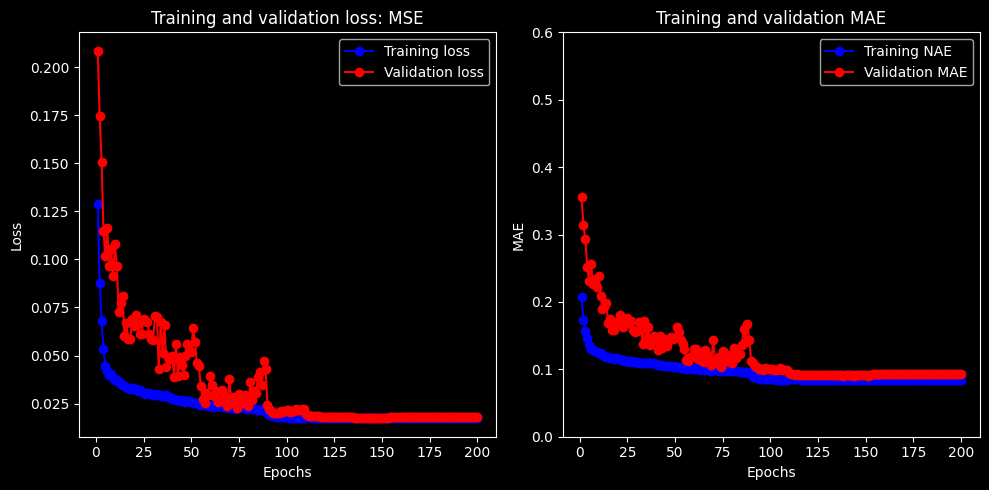

Test MAE: 53374.25
Elapsed time:  1353.9100134372711


In [29]:
# Applaing adaptative learning rate
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=0.000000000001)

np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.GRU(16, return_sequences=False)(inputs)
x = keras.layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=200, model_name="gru_simplified_lradaptative.h5", callbacks=[reduce_lr])

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [30]:
mdeol = keras.models.load_model(dir + "gru_simplified_lradaptative.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 0s 2ms/step - loss: 0.0181 - mean_absolute_error: 0.0933


53374.25062619922

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 gru_3 (GRU)                 (None, 8)                 384       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3986/4005 [============================>.] - ETA: 0s - loss: 0.1581 - mean_absolute_error: 0.2378
Epoch 1: val_mean_absolute_error improved from inf to 0.28818, saving model to mode

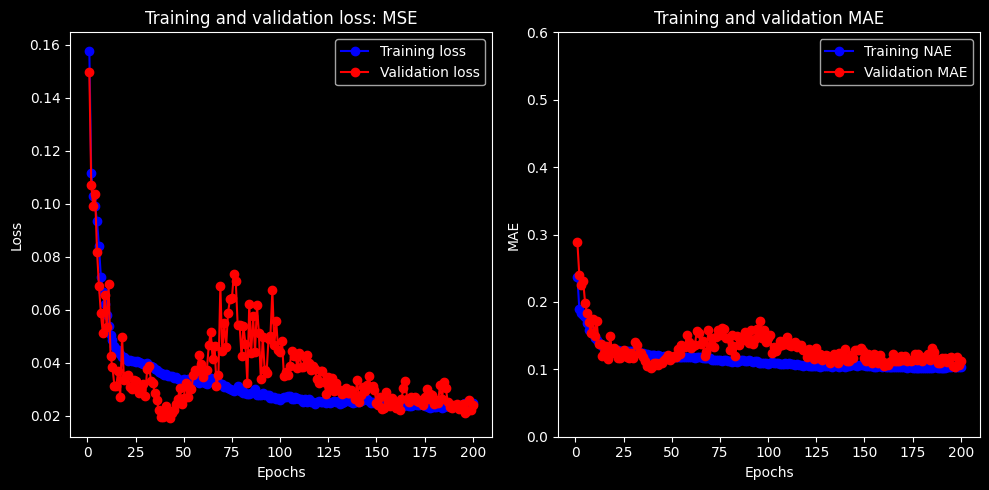

Test MAE: 63954.02
Elapsed time:  1319.00874710083


In [21]:
from keras import regularizers
import numpy as np
import time
import keras

l2 = 0.000001

np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.GRU(8, return_sequences=False, kernel_regularizer=regularizers.l2(l2), recurrent_regularizer=regularizers.l2(l2), bias_regularizer=regularizers.l2(l2), activity_regularizer=l2(l2))(inputs)
x = keras.layers.Dense(8, activation="relu", kernel_regularizer=regularizers.l2(l2), bias_regularizer=regularizers.l2(l2))(x)
outputs = layers.Dense(1, activation="linear")(x)
model = keras.Model(inputs, outputs)


model.summary()
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=200, model_name="gru_simplifiedv2_reg.h5")

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [22]:
model = keras.models.load_model(dir + "gru_simplifiedv2_reg.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 1s 2ms/step - loss: 0.0194 - mean_absolute_error: 0.1015


58033.59535118457

At this point we decided to change focus. In this case, the objective is not a comparison between techniques or the search for the best results, the objective is to reduce the necessary computational resources.

The first approach is to reduce the units in each layer of our model to a quarter. With this reduction, the MAE only worsens by 4.2%. On the other hand, the best model is not reached in the 70s, but more than the 100s, and it has been necessary to apply an adaptive learning rate.

Note that even if we reduce the number of units to a quarter, the number of parameters is reduced, this model only uses 16.4% of the parameters of the original model.

Seeing the good results achieved, we intend to see what happens by further reducing the model. In this case we use only 8 units per layer. With this we obtain a model that only has 465 parameters, which is 5.3% of the parameters of the original model. This model shows a behavior that is clearly worse than that of the previous cases, although it should be noted that it improves the result proposed for the task.

The most remarkable thing is the behavior that we appreciate in the training curves.


In addition to the numerical results, the most notable are the curves that we see in the case of 8 units. If we look at the behavior up to epoch 75, we would affirm that we are dealing with a model that shows overfitting, however, we see how as the epochs continue to pass, the error on validation is reduced again, which would not fit with a tendency to overfit .

What we believe is happening is that during those epochs in which the results on the validation set worsen, the model is increasing, the precision on patterns more present in the training set than those present in the test set. After a few more epochs it is partly reversed as can be seen from epoch 100 onwards. That is to say, normally when we talk about overfitting it is associated with a tendency to memorization present in large models, while in this case what seems to occur is a greater optimization in the random patterns that are more represented in the training set.

It is important to note that this does not have to be associated with an error in the choice of data or preprocessing. In this case, the data used belongs to different series and we have carried out preprocessing care to prevent this aspect from conditioning the training in any way and leading to worse models. We refer to the pre-processing carried out by the teachers.


# Seeking to improve results

<style>
.center {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;
}
</style>

<div style="text-align: justify; margin:auto;width:90%;">

We apply L2 normalization to try to reduce the tendency to overfitting as much as possible and to shorten as much as possible the gap between the results on the between-handling and test set even though we have not seen in the starting model any clear overfitting. Moreover, we use an adaptive learning rate, since our objective now is not to make the experiments repeatable and comparable between different models or techniques but to achieve the best results. 

After several studies we propose to reduce the patience of the learning rate to 10 in order to have a more aggressive reduction and we change the cost function to MAE, because with the previous case we were in very low errors, less than 1%, and what we are looking for is to increase the impact of the errors in order to reduce them.

</div>

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12, 6)]           0         
                                                                 
 gru_4 (GRU)                 (None, 64)                13824     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3999/4005 [============================>.] - ETA: 0s - loss: 0.2206 - mean_absolute_error: 0.2190
Epoch 1: val_mean_absolute_error improved from inf to 0.31575, saving model t

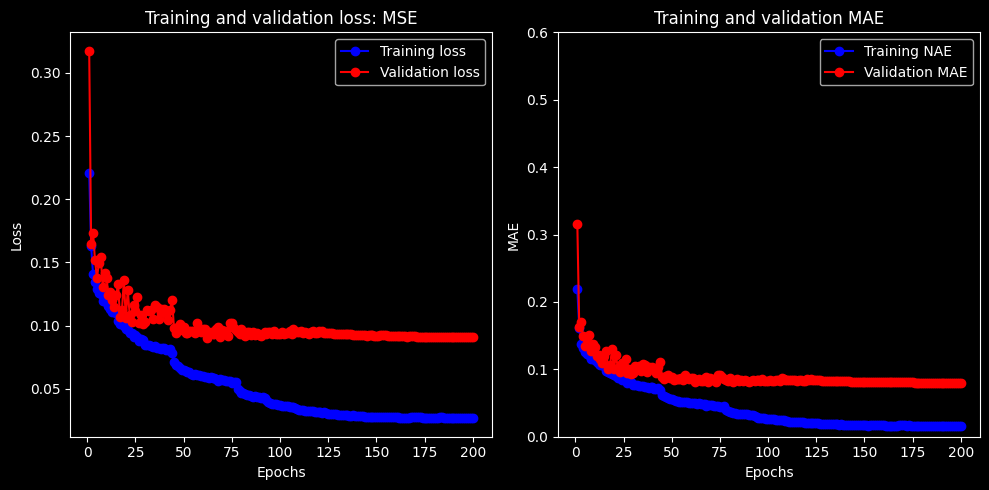

Test MAE: 45857.22
Elapsed time:  1304.1117460727692


In [ ]:
# Applaing adaptative learning rate
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.000000000001)
reg_val = 0.00001

np.random.seed(423423)
tf.random.set_seed(1232413)
start_time = time.time()
inputs = keras.Input(shape=(seqLength, 6))
x = layers.GRU(64, return_sequences=False, kernel_regularizer=l2(reg_val), recurrent_regularizer=l2(reg_val), bias_regularizer=l2(reg_val), activity_regularizer=l2(reg_val))(inputs)
x = keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(reg_val), bias_regularizer=l2(reg_val))(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()
model.compile(optimizer="Adam", loss="mean_absolute_error", metrics=["mean_absolute_error"])

result = fitModel(model, trainData, testData, num_epochs=200, model_name="gru_best_v2.h5", callbacks=[reduce_lr])

end_time = time.time()
print(f"Test MAE: {result[1]*stdSales:.2f}")
print("Elapsed time: ", end_time - start_time)

In [ ]:
mdoel = keras.models.load_model(dir + "gru_best_v2.h5")
model.evaluate(testData)[1]*stdSales

180/180 [==============================] - 0s 2ms/step - loss: 0.0908 - mean_absolute_error: 0.0802


45857.21542893941

In this case we obtain the best results of all the work. This model employs both regularization and adaptive learning rate.

The most remarkable thing for us is the behavior that we see in the curves of the learning rate. We see a strong downward trend until epoch 50 where it seems to be stagnating and the learning rate is reduced and again the model begins to descend, this is seen again around epoch 80.